/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


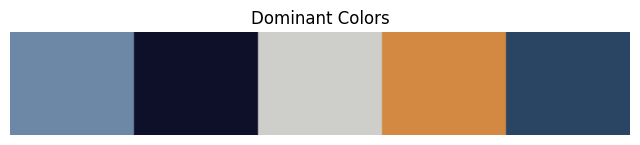

In [7]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
class DominantColorDetector:
    def __init__(self, n_colors=3):
        self.n_colors = n_colors
        self.model = None
    def preprocess_image(self, image_path):
        try:
            img = cv2.imread(image_path)
            if img is None:
                raise FileNotFoundError(f"Image file '{image_path}' not found")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_pixels = img.reshape((-1, 3))
            return img_pixels
        except Exception as e:
            raise ValueError(f"Error preprocessing image: {e}")
    def fit(self, img_pixels):
        try:
            self.model = KMeans(n_clusters=self.n_colors)
            self.model.fit(img_pixels)
        except Exception as e:
            raise ValueError(f"Error fitting K-means model: {e}")
    def get_dominant_colors(self):
        try:
            if self.model is None:
                raise ValueError("Model not trained. Please call 'fit' method first.")
            dominant_colors = self.model.cluster_centers_.astype(np.uint8)
            return dominant_colors
        except Exception as e:
            raise ValueError(f"Error getting dominant colors: {e}")
    def visualize_colors(self, colors):
        try:
            if colors is None:
                return
            palette = np.zeros((50, 300, 3), dtype=np.uint8)
            start = 0
            for color in colors:
                end = start + 300 // len(colors)
                palette[:, start:end, :] = color
                start = end
            plt.figure(figsize=(8, 4))
            plt.imshow(palette)
            plt.axis('off')
            plt.title('Dominant Colors')
            plt.show()
        except Exception as e:
            raise ValueError(f"Error visualizing dominant colors: {e}")
image_path = '/content/image.jpg'
n_colors = 5
detector = DominantColorDetector(n_colors)
img_pixels = detector.preprocess_image(image_path)
detector.fit(img_pixels)
dominant_colors = detector.get_dominant_colors()
detector.visualize_colors(dominant_colors)